In [32]:
# Libraries
import random
import numpy
import matplotlib.pyplot
import matplotlib as plt
## file with the solution of the fire fighter problem
import ffp


#### Genetic

In [33]:
# Individual initialization
def createIndividual(n):
  ans = []
  for num in range(n):
    ans.append(numpy.random.choice([0,0,0,0,0,0,0,0,1,1]))  
  # return numpy.random.randint(0 , 2, n)
  return numpy.array(ans)
p = createIndividual(10)
print(p)

[1 0 1 0 0 0 0 1 0 1]


In [34]:
# Get size of the list for N nodes
def listSize(n_nodes):
    '''
    sumatoria de 1 a n - 1'''
    return sum(range(1,n_nodes))

In [35]:
def listToMatrix(arrs, n):
    '''
    Transform a list to a supirior triangule of a matrix
    '''
    arr = arrs.tolist()
    matrix = [[ 0 for x in range (n)] for x in range (n)] 
    # for val in arr : 
    for i in range(n):
        for j in range (i+1,n):
            matrix[i][j] = arr.pop(0)
            matrix[j][i] = matrix[i][j]
    return matrix
# print(listSize(5))
# print(createIndividual(listSize(5)))
# [1 0 1 0 0 1 1 1 0 1]
for li in listToMatrix(numpy.array([0 ,0 ,1 ,0 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,1 ,1 ,1 ]),10):
    print(li )

[0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 1, 1, 1, 0, 1, 1, 1]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 1, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
[0, 1, 1, 0, 0, 0, 0, 1, 1, 0]


In [36]:
# Crossover operator
def combine(parentA, parentB, cRate):
  if (random.random() <= cRate):
    cPoint = numpy.random.randint(1, len(parentA))
    #print(cPoint)
    offspringA = numpy.append(parentA[0:cPoint], parentB[cPoint:])
    offspringB = numpy.append(parentB[0:cPoint], parentA[cPoint:])
  else:
    offspringA = numpy.copy(parentA)
    offspringB = numpy.copy(parentB)
  return offspringA, offspringB

p1 = createIndividual(10)
p2 = createIndividual(10)
print(p1)
print(p2)
o1, o2 = combine(p1, p2, 1.0)
print(o1)
print(o2)


[0 0 0 0 0 0 0 0 1 0]
[1 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 0 1 0 0 0]
[1 0 0 0 0 0 0 0 1 0]


In [37]:
# Mutation operator
def mutate(individual, mRate):
  for i in range(len(individual)):
    if (random.random() <= mRate):
      individual[i] = not(individual[i])
  return individual

p1 = createIndividual(10)
print(p1)
mutate(p1, 0.10)
print(p1)

[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 1 0]


In [38]:
 #* Evaluation function
def evaluate(individual, n, heuristic , best):
    ffp.resetValues()
    ffp.adjacency = numpy.array(listToMatrix(individual,n))
    #& global
    ffp.ffp(ffp.degreeGlobal, False)
    ans_global = ffp.n_burned

    #& Local
    ffp.resetValues()
    ffp.ffp(ffp.degreeLocal, False)
    ans_local = ffp.n_burned

    #& BST
    ffp.resetValues()
    ffp.ffp(ffp.biggestSubtree,False)
    ans_bst = ffp.n_burned

    #& BGC
    ffp.resetValues()
    ffp.ffp(ffp.biggestGrandChildren,False)
    ans_bgc = ffp.n_burned
    if heuristic == 'local':
        if best== True:
            return ( min(ans_bgc,ans_global, ans_bst) -  ans_local) 
        else : return ( ans_local - max(ans_bgc,ans_global, ans_bst) )

    elif heuristic == 'global':
        if best== True:
            return ( min(ans_local,ans_bgc, ans_bst) -ans_global) 
        else: return ( ans_global - max(ans_local,ans_bgc, ans_bst)) 

    elif heuristic == 'bst':
        if best== True:
            return ( min(ans_local,ans_global, ans_bgc) -  ans_bst) 
        else: return  ( ans_bst - max(ans_local,ans_global, ans_bgc)) 
        
    elif heuristic == 'bgc':
        if best== True:
            return ( min(ans_local,ans_global, ans_bst) -  ans_bgc) 
        else : return ( ans_bgc - max(ans_local,ans_global, ans_bst) ) 
  
minum = 12
p1 = createIndividual(listSize(minum))
print(evaluate(p1,minum,'bst',True))

0


In [39]:
# Tournament selection
def select(population, evaluation, tSize):
  winner = numpy.random.randint(0, len(population))
  for i in range(tSize - 1):
    rival = numpy.random.randint(0, len(population))
    if (evaluation[rival] > evaluation[winner]):
      winner = rival
  return population[winner]

In [40]:
# Genetic algorithm
def geneticAlgorithm(n, pSize, gens, cRate, mRate, heu, best):
  # Creates the initial population
  population = [None] * pSize
  evaluation = [None] * pSize
  size_of_list = listSize(n)
  for i in range(pSize):
    population[i] = createIndividual(size_of_list)
    evaluation[i] = evaluate(population[i], n, heu, best)
  # Keeps a record of the best individual found so far
  index = 0
  for i in range(1, pSize):
    if (evaluation[i] > evaluation[index]):
      index = i
  bestIndividual = population[index]
  bestEvaluation = evaluation[index]
  bbEvalaluation = []
  bbIndividuals = []
  bbEvalaluation.append(bestEvaluation)
  bbIndividuals.append(bestIndividual)
  # Keeps the information for plotting the performance of the algorithm
  best = [0] * gens
  avg = [0] * gens
  # Runs the evolutionary process
  for i in range(gens):
    k = 0
    newPopulation = [None] * pSize
    # Crossover
    for j in range(pSize // 2):
      parentA = select(population, evaluation, 3)
      parentB = select(population, evaluation, 3)
      offspring1, offspring2 = combine(parentA, parentB, cRate)
      newPopulation[k] = offspring1
      newPopulation[k + 1] = offspring2
      k = k + 2
    population = newPopulation
    # Mutation
    for j in range(pSize):
      population[j] = mutate(population[j], mRate)
      evaluation[j] = evaluate(population[j], n, heu, best)
      # Keeps a record of the best individual found so far
      if (evaluation[j] > bestEvaluation):
        bestEvaluation = evaluation[j]
        bestIndividual = population[j]
      best[i] = bestEvaluation
      avg[i] = numpy.average(evaluation)
    bbEvalaluation.append(bestEvaluation)
    bbIndividuals.append(bestIndividual)
  # matplotlib.pyplot.plot(range(gens), best, label = "Best")
  # matplotlib.pyplot.plot(range(gens), avg, label = "Average")
  # matplotlib.pyplot.legend()
  # matplotlib.pyplot.title("GA Run")
  # matplotlib.pyplot.show()
  # Returns the best individual found so far
  return bestIndividual, bestEvaluation, bbEvalaluation, bbIndividuals

In [41]:
# # Tests
# nodes = 30
# generations = 80
# population = 30
# solution, eval ,allBestEvaluations, allBestIndv= geneticAlgorithm(nodes, population, generations, 1.0, 0.01)
# # print(eval)
# # print(solution)
# print('evaluation:',eval)
# print(allBestEvaluations)

#### Best Individual

In [42]:

matrixSolution = listToMatrix(solution, nodes)
matrixSolution


[[0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1],
 [0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,

### Creation of Maps

#### Visualization of methods

##### Gloabal

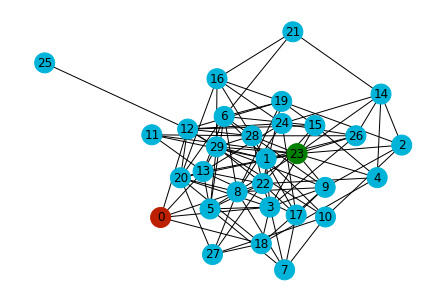

Lista currNode por quemar {3, 12, 13, 18, 22}
currNode ya quemados [0]
currNode protegidos [23]

----------------------------------------


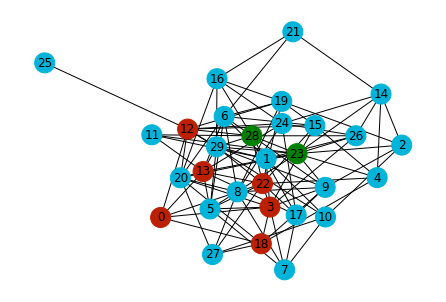

Lista currNode por quemar {1, 4, 5, 6, 7, 9, 10, 11, 15, 17, 19, 20, 24, 25, 26, 27, 29}
currNode ya quemados [0, 3, 12, 13, 18, 22]
currNode protegidos [23, 28]

----------------------------------------


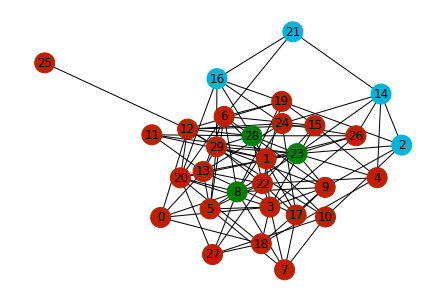

Lista currNode por quemar {2, 14, 16, 21}
currNode ya quemados [0, 3, 12, 13, 18, 22, 1, 4, 5, 6, 7, 9, 10, 11, 15, 17, 19, 20, 24, 25, 26, 27, 29]
currNode protegidos [23, 28, 8]

----------------------------------------


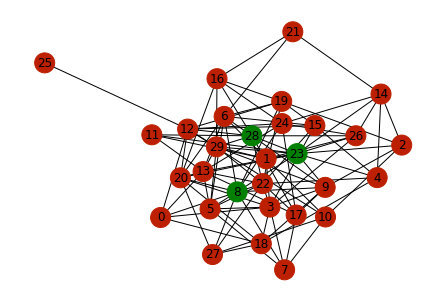

Lista currNode por quemar set()
currNode ya quemados [0, 3, 12, 13, 18, 22, 1, 4, 5, 6, 7, 9, 10, 11, 15, 17, 19, 20, 24, 25, 26, 27, 29, 2, 14, 16, 21]
currNode protegidos [23, 28, 8]

----------------------------------------


27

In [43]:
ffp.resetValues()
ffp.adjacency = numpy.array(matrixSolution)
ffp.ffp(ffp.degreeGlobal, True)
ffp.n_burned

##### Local

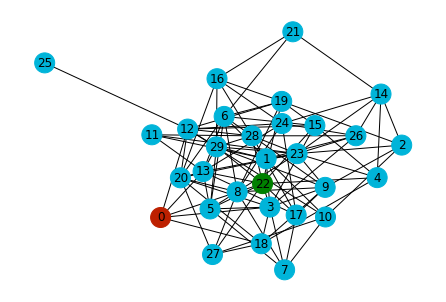

Lista currNode por quemar {3, 12, 13, 18}
currNode ya quemados [0]
currNode protegidos [22]

----------------------------------------


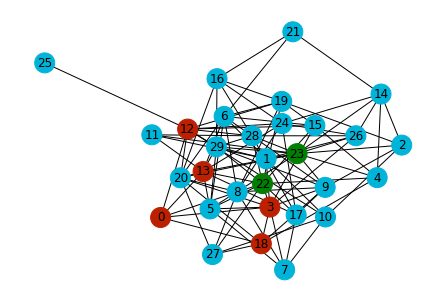

Lista currNode por quemar {1, 4, 5, 6, 7, 9, 10, 11, 15, 17, 19, 20, 24, 25, 26, 27, 28, 29}
currNode ya quemados [0, 3, 12, 13, 18]
currNode protegidos [22, 23]

----------------------------------------


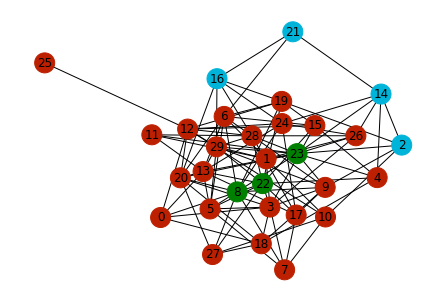

Lista currNode por quemar {2, 14, 16, 21}
currNode ya quemados [0, 3, 12, 13, 18, 1, 4, 5, 6, 7, 9, 10, 11, 15, 17, 19, 20, 24, 25, 26, 27, 28, 29]
currNode protegidos [22, 23, 8]

----------------------------------------


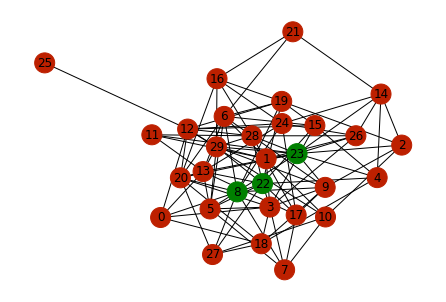

Lista currNode por quemar set()
currNode ya quemados [0, 3, 12, 13, 18, 1, 4, 5, 6, 7, 9, 10, 11, 15, 17, 19, 20, 24, 25, 26, 27, 28, 29, 2, 14, 16, 21]
currNode protegidos [22, 23, 8]

----------------------------------------


27

In [44]:
ffp.resetValues()
ffp.adjacency = numpy.array(matrixSolution)
ffp.ffp(ffp.degreeLocal, True)
ffp.n_burned

##### Biggest Sub-tree

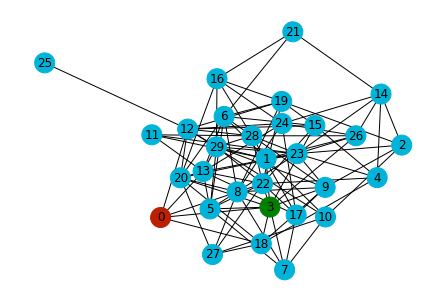

Lista currNode por quemar {12, 13, 18, 22}
currNode ya quemados [0]
currNode protegidos [3]

----------------------------------------


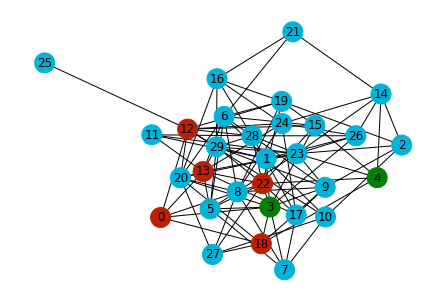

Lista currNode por quemar {5, 6, 9, 10, 11, 15, 17, 19, 20, 23, 24, 25, 27, 28, 29}
currNode ya quemados [0, 12, 13, 18, 22]
currNode protegidos [3, 4]

----------------------------------------


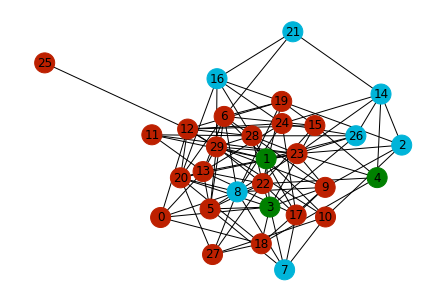

Lista currNode por quemar {2, 7, 8, 14, 16, 21, 26}
currNode ya quemados [0, 12, 13, 18, 22, 5, 6, 9, 10, 11, 15, 17, 19, 20, 23, 24, 25, 27, 28, 29]
currNode protegidos [3, 4, 1]

----------------------------------------


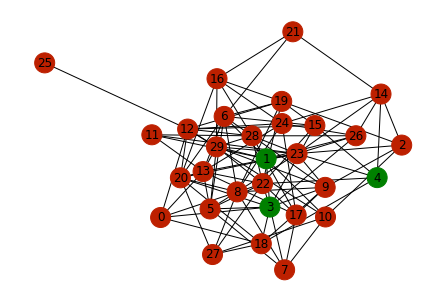

Lista currNode por quemar set()
currNode ya quemados [0, 12, 13, 18, 22, 5, 6, 9, 10, 11, 15, 17, 19, 20, 23, 24, 25, 27, 28, 29, 2, 7, 8, 14, 16, 21, 26]
currNode protegidos [3, 4, 1]

----------------------------------------


27

In [45]:
ffp.resetValues()
ffp.adjacency = numpy.array(matrixSolution)
ffp.ffp(ffp.biggestSubtree, True)
ffp.n_burned

##### Biggest Grandchildren

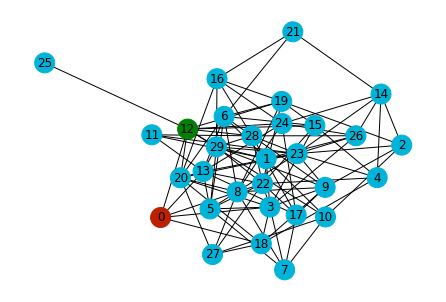

Lista currNode por quemar {3, 13, 18, 22}
currNode ya quemados [0]
currNode protegidos [12]

----------------------------------------


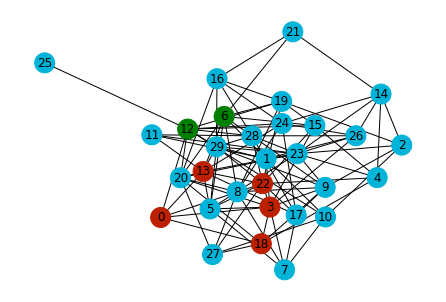

Lista currNode por quemar {1, 4, 5, 7, 9, 11, 15, 17, 19, 20, 23, 24, 26, 27, 28, 29}
currNode ya quemados [0, 3, 13, 18, 22]
currNode protegidos [12, 6]

----------------------------------------


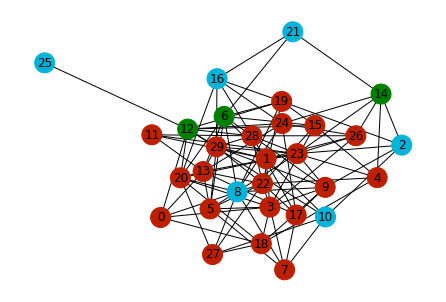

Lista currNode por quemar {2, 8, 10, 16}
currNode ya quemados [0, 3, 13, 18, 22, 1, 4, 5, 7, 9, 11, 15, 17, 19, 20, 23, 24, 26, 27, 28, 29]
currNode protegidos [12, 6, 14]

----------------------------------------


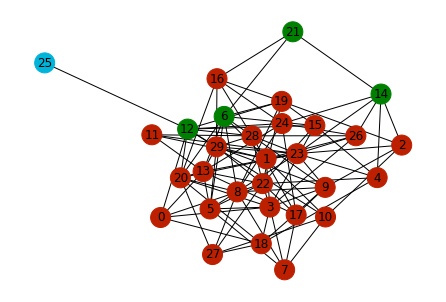

Lista currNode por quemar set()
currNode ya quemados [0, 3, 13, 18, 22, 1, 4, 5, 7, 9, 11, 15, 17, 19, 20, 23, 24, 26, 27, 28, 29, 2, 8, 10, 16]
currNode protegidos [12, 6, 14, 21]

----------------------------------------


25

In [46]:
ffp.resetValues()
ffp.adjacency = numpy.array(matrixSolution)
ffp.ffp(ffp.biggestGrandChildren, True)
ffp.n_burned

### Creation of files

In [47]:
def evaluateFile(myFile, myMatrix, method, best):
    ffp.resetValues()
    ffp.adjacency = numpy.array(myMatrix)
    #& global
    ffp.ffp(ffp.degreeGlobal, False)
    ans_global = ffp.n_burned

    #& Local
    ffp.resetValues()
    ffp.ffp(ffp.degreeLocal, False)
    ans_local = ffp.n_burned

    #& BST
    ffp.resetValues()
    ffp.ffp(ffp.biggestSubtree,False)
    ans_bst = ffp.n_burned

    #& BGC
    ffp.resetValues()
    ffp.ffp(ffp.biggestGrandChildren,False)
    ans_bgc = ffp.n_burned

    if best:
        results = open("results_"+str(method)+"/results"+str(method)+"best.csv" , 'a')
    else:
        results = open("results_"+str(method)+"/results"+str(method)+"worst.csv" , 'a')
    results.write(f'{myFile},{ans_global},{ans_local},{ans_bst},{ans_bgc}, {method} \n')
    results.close()
# nuestras heuristicas
heu = ['local', 'global', 'bst','bgc']

numer_of_files = 30
nodes = 10
generations = 80
population = 30
# cada una de las heuristicas
for method in heu:
    # 2 veces, una mejor y una peor
    best= True
    count = 1
    for files in range (numer_of_files):
        solution, eval ,allBestEvaluations, allBestIndv= geneticAlgorithm(nodes, population, generations, 1.0, 0.01, method , best )
        matrixSolution = listToMatrix(solution, nodes)
        filename = str(nodes)+"_" +str(method) + "_"+str(generations)+"g_" +str(population) +'p_8-10_'+str(count) + str(best)+'.txt'
        f = open("maps"+method+"/"+filename, "a")
        for num in range(nodes):
            f.write(','+str(num))
        f.write("\n")
        for line in range(len(matrixSolution)):
            f.write(str(line))
            for element in range(len(matrixSolution[line])):
                f.write(","+str(matrixSolution[line][element]))
            f.write('\n'), matrixSolution
        f.close()
        count+=1
        evaluateFile(filename, matrixSolution, method, best)
    best= False
    count = 1
    for files in range (numer_of_files):
        solution, eval ,allBestEvaluations, allBestIndv= geneticAlgorithm(nodes, population, generations, 1.0, 0.01, method , best )
        matrixSolution = listToMatrix(solution, nodes)
        filename = str(nodes)+"_" +str(method) + "_"+str(generations)+"g_" +str(population) +'p_8-10_'+str(count) + str(best)+'.txt'
        f = open("maps"+method+"/"+filename, "a")
        for num in range(nodes):
            f.write(','+str(num))
        f.write("\n")
        for line in range(len(matrixSolution)):
            f.write(str(line))
            for element in range(len(matrixSolution[line])):
                f.write(","+str(matrixSolution[line][element]))
            f.write('\n'), matrixSolution
        f.close()
        count+=1
        evaluateFile(filename, matrixSolution, method, best)

### Vizualization of evolution

In [48]:
import seaborn as sns
import pandas as pd

min_val, max_val = 0, 100
# intersection_matrix = numpy.array(allBestIndv).transpose()
# cm = sns.light_palette("#9E1946", as_cmap=True)
# x=pd.DataFrame(intersection_matrix)
# x.style.render
# x=x.style.background_gradient(cmap=cm)
# display(x)

#### References
Transpose a matrix <br>
https://www.journaldev.com/32984/numpy-matrix-transpose-array#:~:text=NumPy%20Matrix%20transpose()%20–%20Transpose%20of%20an%20Array%20in%20Python&text=The%20transpose%20of%20a%20matrix,shape%20(Y%2C%20X). <br>

Display matrix - heatcolor <br>
https://stackoverflow.com/questions/40887753/display-matrix-values-and-colormap